In [1]:
from plotting import read_result_parameters, parse_yaml_file
import yaml

# Opening the darklens results

You can parse the yaml file to retreive the saved results (from the darklens run) and parameters.

In [2]:
with open('examples/example_2.yaml', 'r') as input_yaml:
    settings = yaml.safe_load(input_yaml)

parameters, samples_filename, plot_filename = parse_yaml_file(settings)

Parameters is a python dictionary.

In [3]:
parameters

{'alpha': 260.87806378284154,
 'delta': -27.37877344566956,
 't0par': 7491.0,
 'extinction': '0.6249, 0.001892, -5.226e-07, 5.784e-11, -2.199e-15',
 'ds_median': 8.0,
 'ds_err_neg': 5,
 'ds_err_pos': 8.0,
 'source_mag_err': 0.07,
 'source_star': 'giant',
 'theta_star': 8.83,
 'theta_star_sig': 11.49,
 'mu_ra': -4.60516696452571,
 'mu_ra_sig': 0.05998582,
 'mu_dec': -5.56086622451114,
 'mu_dec_sig': 0.041736063,
 'mu_ra_dec_corr': 0.21241449}

Load the samples filename in the required format.

In [4]:
results = read_result_parameters(samples_filename)

The samples are parsed to a dictionary format. The arrays are values of the samples for specific attributes.

In [5]:
results

{'weights': array([3.19004036e-08, 4.19636444e-08, 2.80726313e-08, ...,
        1.92659663e-07, 2.58520516e-08, 7.41862899e-08]),
 'ML': array([0.82950643, 0.89674812, 0.69568606, ..., 1.21870307, 0.41914217,
        1.26832441]),
 'DL': array([0.25219711, 0.2680409 , 0.24324342, ..., 0.1701635 , 0.46050171,
        0.21602133]),
 'mag_blend': array([19.00669282, 20.61401264, 25.        , ..., 25.        ,
        19.41914148, 18.7708719 ]),
 'mag_lens_w_extinction': array([13.86565825, 13.61122701, 14.89719073, ..., 10.7245747 ,
        19.19520081, 11.17357008]),
 'mag_lens_0_extinction': array([12.79592156, 12.5156378 , 13.8421703 , ...,  9.79257441,
        17.80430562, 10.16376668]),
 'mag_source': array([16.19722934, 16.13808551, 16.08899492, ..., 16.07674762,
        16.17328798, 16.22198885]),
 't0': array([2457488.92307976, 2457488.77090165, 2457489.00136057, ...,
        2457488.76929564, 2457488.4083965 , 2457488.20871383]),
 'tE': array([108.70512664, 109.55444059, 101.4084

# Median values

Use these code snippets to get median values of mass, distance, median lens from DLC brightness and median blend from photometric model brightness.

In [6]:
from wquantiles import quantile
import numpy as np

MQ1 = quantile(results["ML"], results["weights"], 15.866/100.)
MQ2 = quantile(results["ML"], results["weights"], 50./100.)
MQ3 = quantile(results["ML"], results["weights"], 84.134/100.)

print("Mass of the lens: $%.2f^{+%.2f}_{-%.2f}$"%(MQ2, MQ3-MQ2, MQ2-MQ1))

Mass of the lens: $0.27^{+0.27}_{-0.13}$


In [7]:
DQ1 = quantile(results["DL"], results["weights"], 15.866/100.)
DQ2 = quantile(results["DL"], results["weights"], 50./100.)
DQ3 = quantile(results["DL"], results["weights"], 84.134/100.)

print("Distance to the lens: $%.2f^{+%.2f}_{-%.2f}$"%(DQ2, DQ3-DQ2, DQ2-DQ1))

Distance to the lens: $0.80^{+0.56}_{-0.38}$


In [8]:
IblEQ1 = np.quantile(results["mag_blend"], 15.866/100.)
IblEQ2 = np.quantile(results["mag_blend"], 50./100.)
IblEQ3 = np.quantile(results["mag_blend"], 84.134/100.)

print("Brightness of the blend: $%.2f^{+%.2f}_{-%.2f}$"%(IblEQ2, IblEQ3-IblEQ2, IblEQ2-IblEQ1,))

Brightness of the blend: $20.26^{+4.74}_{-1.47}$


In [9]:
IblEQ1 = quantile(results["mag_lens_w_extinction"], results["weights"], 15.866/100.)
IblEQ2 = quantile(results["mag_lens_w_extinction"], results["weights"], 50./100.)
IblEQ3 = quantile(results["mag_lens_w_extinction"], results["weights"], 84.134/100.)

print("Brightness of the lens not including extinction: $%.2f^{+%.2f}_{-%.2f}$"%(IblEQ2, IblEQ3-IblEQ2, IblEQ2-IblEQ1))

Brightness of the lens not including extinction: $22.24^{+3.75}_{-4.24}$


In [10]:
IblEQ1 = quantile(results["mag_lens_0_extinction"], results["weights"], 15.866/100.)
IblEQ2 = quantile(results["mag_lens_0_extinction"], results["weights"], 50./100.)
IblEQ3 = quantile(results["mag_lens_0_extinction"], results["weights"], 84.134/100.)

print("Brightness of the lens including extinction: $%.2f^{+%.2f}_{-%.2f}$"%(IblEQ2, IblEQ3-IblEQ2, IblEQ2-IblEQ1))

Brightness of the lens including extinction: $20.41^{+3.24}_{-3.76}$


In [11]:
import numpy as np

thetaE = np.sqrt(results["piEN"]**2 + results["piEE"]**2)*8.144*results["ML"]
IblEQ1 = quantile(thetaE, results["weights"], 15.866/100.)
IblEQ2 = quantile(thetaE, results["weights"], 50./100.)
IblEQ3 = quantile(thetaE, results["weights"], 84.134/100.)

print("Size of the Einstein radius thetaE: $%.2f^{+%.2f}_{-%.2f}$"%(IblEQ2, IblEQ3-IblEQ2, IblEQ2-IblEQ1,))

dist_max = 0.354 * IblEQ2
dist_plus =  0.354 * IblEQ3
dist_minus =  0.354 * IblEQ1
print("Maxiumum displacement: $%.2f^{+%.2f}_{-%.2f}$"%(dist_max, dist_plus, dist_minus))

Size of the Einstein radius thetaE: $1.56^{+1.53}_{-0.73}$
Maxiumum displacement: $0.55^{+1.09}_{-0.29}$


In [12]:
mu_ls = 365.25*thetaE/results["tE"]
muEQ1 = quantile(mu_ls, results["weights"], 15.866/100.)
muEQ2 = quantile(mu_ls, results["weights"], 50./100.)
muEQ3 = quantile(mu_ls, results["weights"], 84.134/100.)

print("Relative proper motion between lens and source mu_LS: $%.2f^{+%.2f}_{-%.2f}$"%(muEQ2, muEQ3-muEQ2, muEQ2-muEQ1))

Relative proper motion between lens and source mu_LS: $5.13^{+5.08}_{-2.38}$


In [13]:
vec_mls_all = mu_ls * np.array([results["piEN"], results["piEE"]])/np.sqrt(results["piEN"]**2+results["piEE"]**2)
vec_mls = quantile(vec_mls_all, results["weights"], 50./100.)

vec_m_s = np.array([parameters["mu_ra"], parameters["mu_dec"]])
vec_m_l = vec_m_s + vec_mls
mu = np.sqrt(vec_m_l[0]**2 + vec_m_l[1]**2)
err_mu_pl = np.sqrt((IblEQ3-IblEQ2)**2 + parameters["mu_ra_sig"]**2 + parameters["mu_dec_sig"]**2)
err_mu_mn = np.sqrt((IblEQ2-IblEQ1)**2 + parameters["mu_ra_sig"]**2 + parameters["mu_dec_sig"]**2)
print("Proper motion of the lens lens: $%.2f^{%.2f}_{-%.2f}$"%(mu, err_mu_pl, err_mu_mn))

Proper motion of the lens lens: $10.53^{1.54}_{-0.73}$


In [14]:
v_t = 4.74 * mu * DQ2
err_v_t_pl = 4.74 * (DQ2*err_mu_pl + mu*(DQ3-DQ2))
err_v_t_mn = 4.74 * (DQ2*err_mu_mn + mu*(DQ2-DQ1))

print("Transverse velocity of the lens: $%.2f^{+%.2f}_{-%.2f}$"%(v_t, err_v_t_pl, err_v_t_mn))

Transverse velocity of the lens: $39.83^{+33.77}_{-21.62}$


# Plots

## Mass-distance plot

In [15]:
from plotting import blend_lens_plot, mass_distance_plot
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

### Continuous plot

The default mode is the continous, log density plot.

--- PLOTTING MASS-DISTANCE PLOT ---


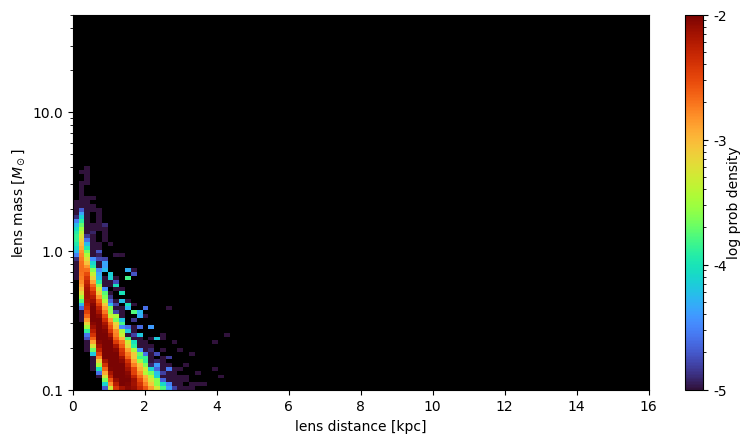

In [16]:
mass_distance_plot(parameters, results);

Adjust boundries of the plot like so:

--- PLOTTING MASS-DISTANCE PLOT ---


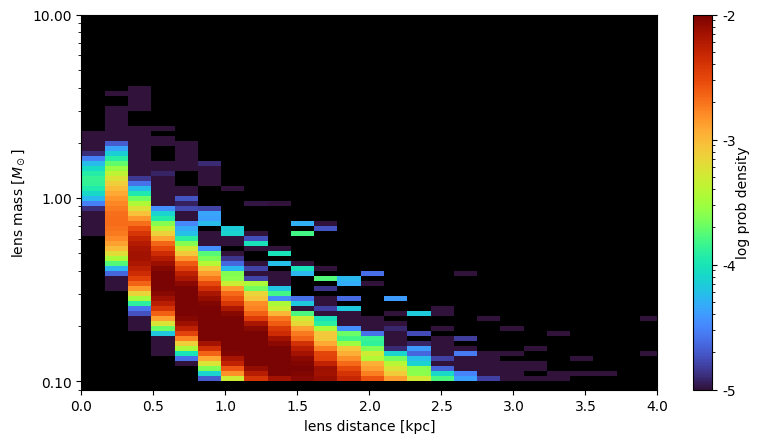

In [17]:
mass_distance_plot(parameters, results, x_limits=[0,4], y_limits=[0.09,10.]);

### Contour plot

Use the peacock_sigma_contours kwarg to plot the filled sigma contours using the peacock palette.

Sometimes when plotting the filled contours you also have to use more or less bins than the default value (100).

--- PLOTTING MASS-DISTANCE PLOT ---
None


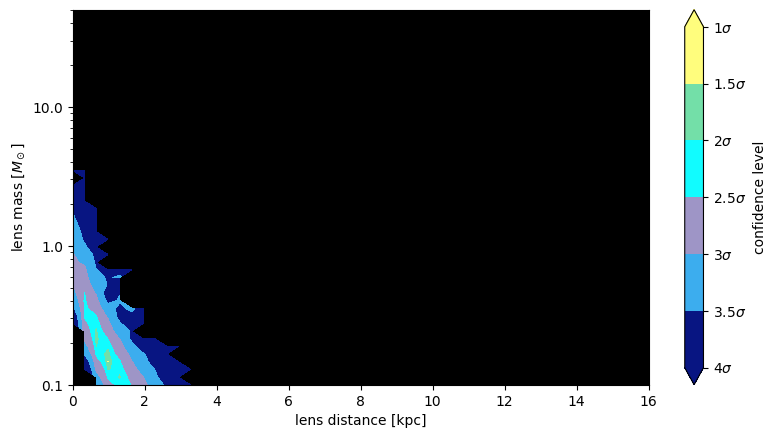

In [19]:
mass_distance_plot(parameters, results, peacock_sigma_contours=True, histogram_bins=50);

The turbo palette is color-blind-friendly.

--- PLOTTING MASS-DISTANCE PLOT ---
None


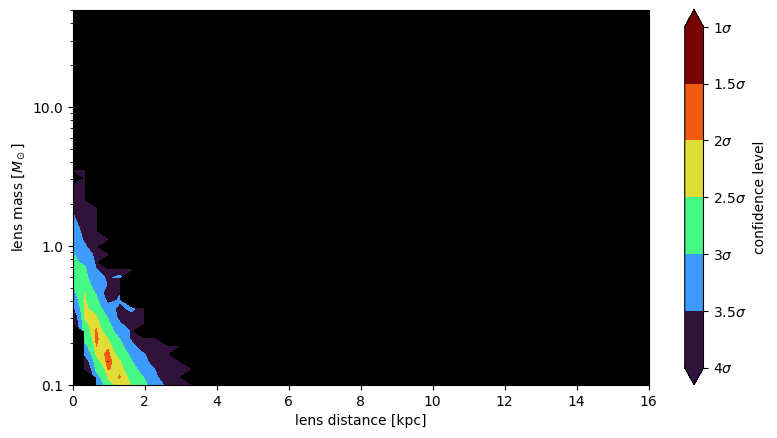

In [25]:
mass_distance_plot(parameters, results, turbo_sigma_contours=True, histogram_bins=50);

Use the blend_eq_lens kwarg to calculate the likelihood values only for the cases where blend light is assumed to equal lens light. (The extinction is taken into account and all values between 0 and max extinction, passed as a parameter, are calculated.)

--- PLOTTING MASS-DISTANCE PLOT FOR BLEND==LENS ---
None


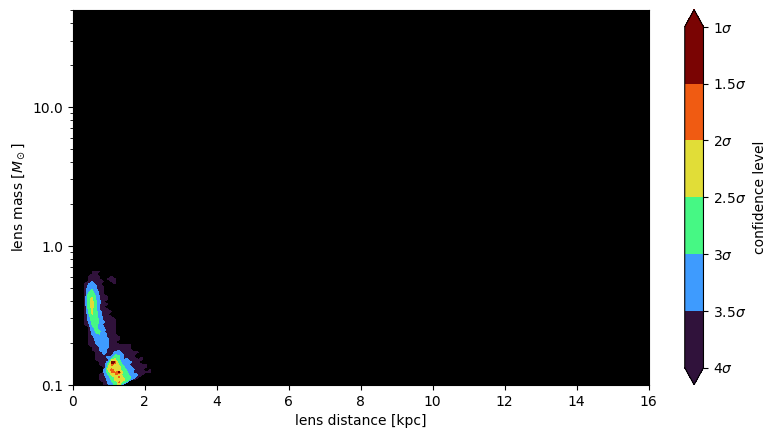

In [30]:
mass_distance_plot(parameters, results, blend_eq_lens=True,
                   turbo_sigma_contours=True, histogram_bins=150);

Pass the figsize and axis kwargs to resize the figure size (its passed as te figsize kwarg to plt.figure) or include the plot as a subplot.

You might want to pass include_cbar=False kwarg to disable one colorbar, so that there are no multiple colorbars.

## Blend-light plot

--- PLOTTING BLEND-LENS PLOT ---


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U51')) -> None

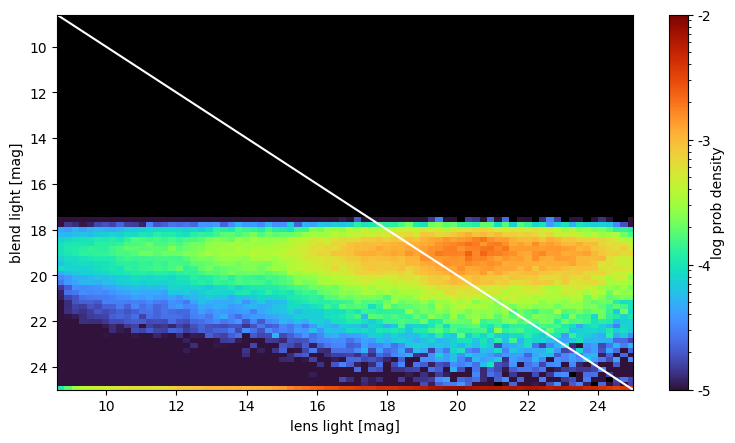

In [22]:
blend_lens_plot(parameters, results);

You can adjust limits like so:

--- PLOTTING BLEND-LENS PLOT ---


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U51')) -> None

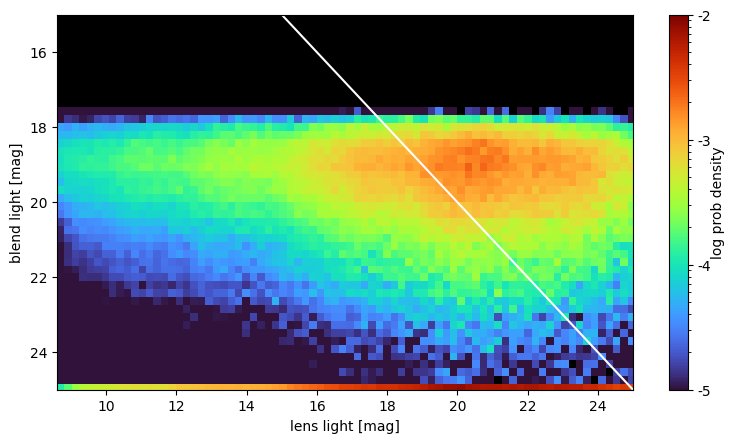

In [23]:
blend_lens_plot(parameters, results, y_limits=[25.0, 15.0]);

All the kwargs are the same as in the case of mass-distance plot. Example:

--- PLOTTING BLEND-LENS PLOT ---


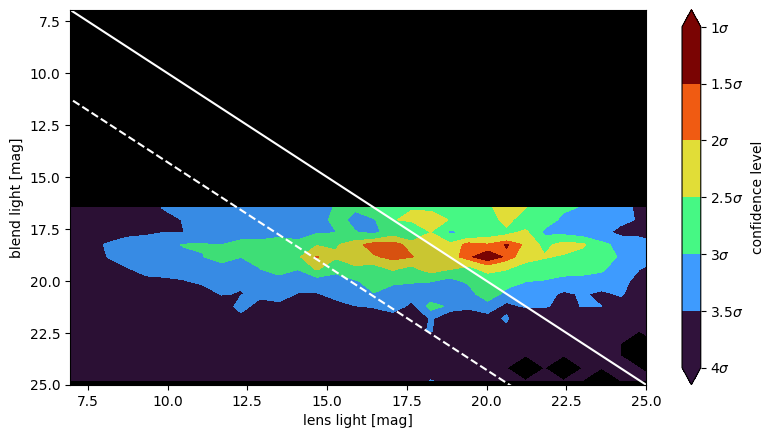

In [23]:
blend_lens_plot(parameters, results, blend_eq_lens=False,
                turbo_sigma_contours=True, histogram_bins=35);

Use the axis kwarg to pass a matplotlib subplot.

**Remember to pass include_cbar=False kwarg** -- so that you don't have two colorbars next to each other :).

--- PLOTTING MASS-DISTANCE PLOT ---
None
--- PLOTTING BLEND-LENS PLOT ---


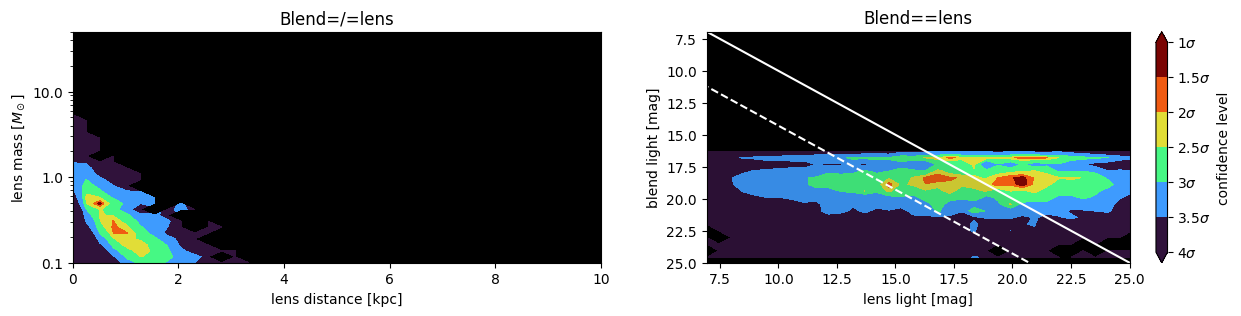

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3));

mass_distance_plot(parameters, results, blend_eq_lens=False,
                   turbo_sigma_contours=True, histogram_bins=40,
                   axis=ax[0], include_cbar=False);
ax[0].set_title('Blend=/=lens');

blend_lens_plot(parameters, results, blend_eq_lens=False,
                   turbo_sigma_contours=True, histogram_bins=40,
                   axis=ax[1]);
ax[1].set_title('Blend==lens');

# Corner plots

The User may want to create a corner plot with estimated mass and distance to the lens.

--- PLOTTING CORNERPLOT ---
Cornerplot saved: ulens-025_corner.png



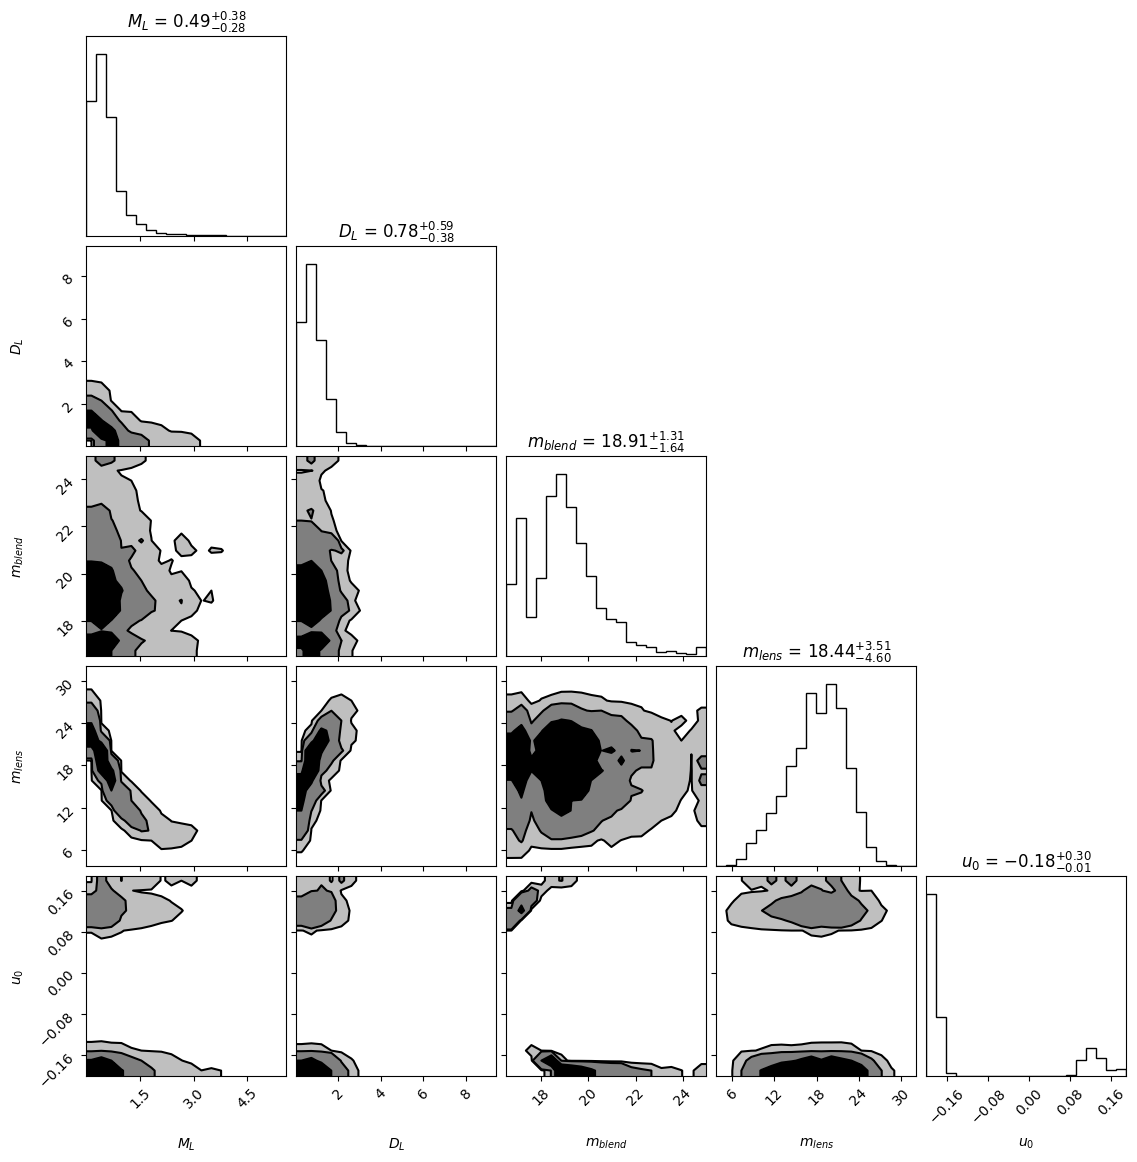

In [25]:
from plotting import cornerplot

cornerplot(plot_filename, results)

# Histograms

In [26]:
from plotting import plot_lens_mass_distributions, plot_lens_distance_distribution, plot_lens_mag_distributions, plot_blend_mag_distributions, plot_histograms

Plot individual histograms for lens mass, lens distance, lens mag and blend mag (note: you have to pass the axis kwarg)

Parameters are also needed for the lens distance to read the max source distance parameter.

AttributeError: 'dict' object has no attribute 'plot'

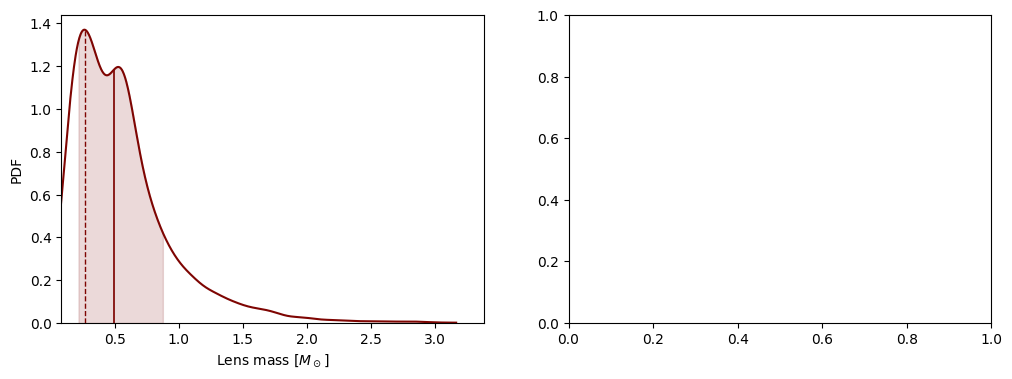

In [27]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_lens_mass_distributions(results, ax[0])
plot_lens_distance_distribution(results, parameters, ax[1])

Parameters are needed for the lens magnitude to read the extinction parameter.

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_lens_mag_distributions(results, parameters, ax[0])
# plot_blend_mag_distributions(results, ax[1])

You might want to **zoom in the axes**. To do that, operate on the subplot passed as the axis kwarg:

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_lens_mag_distributions(results, parameters, ax[0])
# plot_blend_mag_distributions(results, ax[1])

ax[1].set_xlim([14., 22.0])

### Extinction

For the lens mag parameters, use the extinction kwarg (defaults to False) to include the extinction passed from parameters.

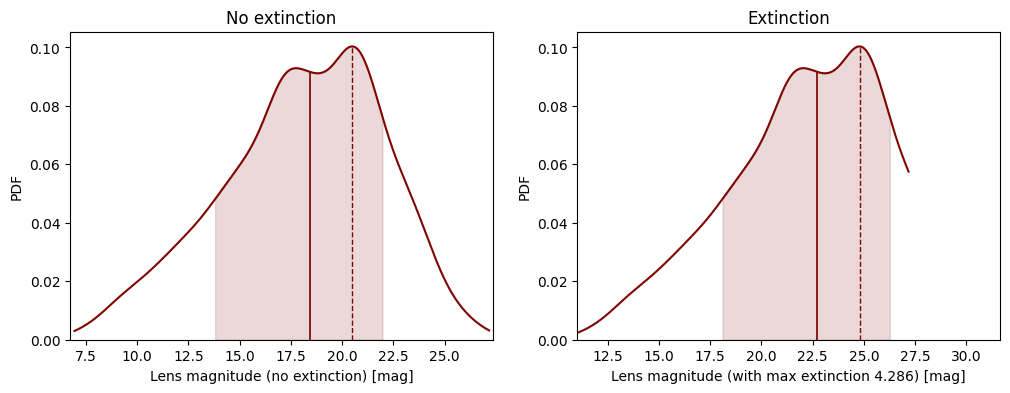

In [28]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_lens_mag_distributions(results, parameters, ax[0])
plot_lens_mag_distributions(results, parameters, ax[1], extinction=True)

ax[0].set_title('No extinction');
ax[1].set_title('Extinction');

### Blend==Lens

You can also pass the blend_eq_lens kwarg (defaults to False) to assume that the whole blend light is the lens light.

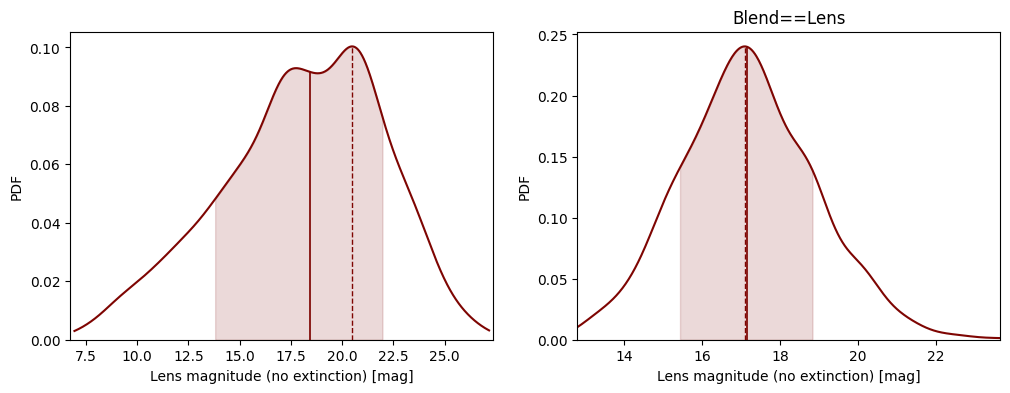

In [29]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_lens_mag_distributions(results, parameters, ax[0])
plot_lens_mag_distributions(results, parameters, ax[1], blend_eq_lens=True)

ax[1].set_title('Blend==Lens');